# Phase 2 Project 

## Overview

## Business Understanding 

In [1]:
import pandas as pd
import resources as helpers    # Has data_exploration, data_preperation and data_visualization
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## Data Understanding

**Columns:** <br>
id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront,  <br>
greenbelt, nuisance, view, condition, grade, heat_source, sewer_system, sqft_above, <br>
sqft_basement, sqft_garage, sqft_patio, yr_built, yr_renovated, address, lat, long  <br>

For this project, we will be looking at variables that would have a strong impact to price. Some features of a house won't be needed and will be removed from the dataset. From the initial look at the data; date, lat, long, address, and id shouldn't have any effect on price. There are quite a bit of independent variables to choose from so I will be limiting them to the ones with the highest positive correlation to price, our dependent variable for this project. 

**Used Columns and Correlation:** <br>
sqft_living: 0.6085, sqft_above: 0.5386, bathrooms: 0.4804, sqft_patio, 0.3134, bedrooms: 0.2892, <br>
sqft_garage: 0.2641, sqft_basement: 0.2450, floors: 0.1805, yr_built: 0.0960, sqft_lot: 0.0857 <br>

In [2]:
df = pd.read_csv('dsc-phase-2-project-v2-5-main/data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [3]:
## Useful from first impressions
useful_col = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront'
              , 'greenbelt', 'nuisance', 'view', 'condition', 'grade', 'heat_source', 'sewer_system'
              , 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio']
## Currently not useful columns
useless_col = ['date', 'id', 'lat', 'long', 'address']
## Columns with categorical data
categorical = [ 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'greenbelt', 'nuisance'
               , 'view', 'condition', 'grade', 'heat_source', 'sewer_system']
continuous = [column for column in useful_col if column not in categorical]

## Data Preperation 1

### Data Cleaning
**Actions needed:** <br>
1. Remove duplicates
2. Remove NaN and missing values
3. Remove unneeded columns
4. Remove outliers
5. Format 'grade'
After looking through the dataset, I organized the dataset between useful, categorical, and continuous data. Categorical need to be prepared for modeling. <br>
There were some missing values and duplcates that need to be removed as well as the columns that won't be used. I took a glimpes of the graph and noticed some outliers in price for the houses. Those were removed to avoid any skewing in the graphs and models. 
After looking at some results and comparing the given column information, the column 'grade' is redudant with the added explaination so they will be convert to strictly integer for manipluation

In [4]:
df_cleaned = helpers.dp.check_and_drop(df)    ## Dropped and removed rows that has small amount of missing values
df_cleaned = helpers.dp.outliers_remove(df_cleaned, 'price')    ## Remove outliers of price
df_cleaned.drop(labels = useless_col, axis = 1, inplace = True)    # Drop columns that wont be useful right now

df_cleaned.replace(df_cleaned['grade'].value_counts().index, ['7','8','9','6','10','5','12','4','13','3','1','2'], inplace= True)

Number of Missing Values: 46
Dropping rows: heat_source
Dropping rows: sewer_system
Number of Missing Values: 0
Number of duplicates: 1
Removed 1 duplicates
Number of duplicates: 0
1214 observations were removed. 


## Baseline Models

### Single Variable Models

Every used variables will be modeled with price to see if there is a strong relationship present individually

In [5]:
## Seperate the contiuous data type with the categorical data type for modelling and prepping
df_prepped_continuous = df_cleaned[continuous].copy()
categorical.append('price')
df_prepped_categorical = df_cleaned[categorical].copy()

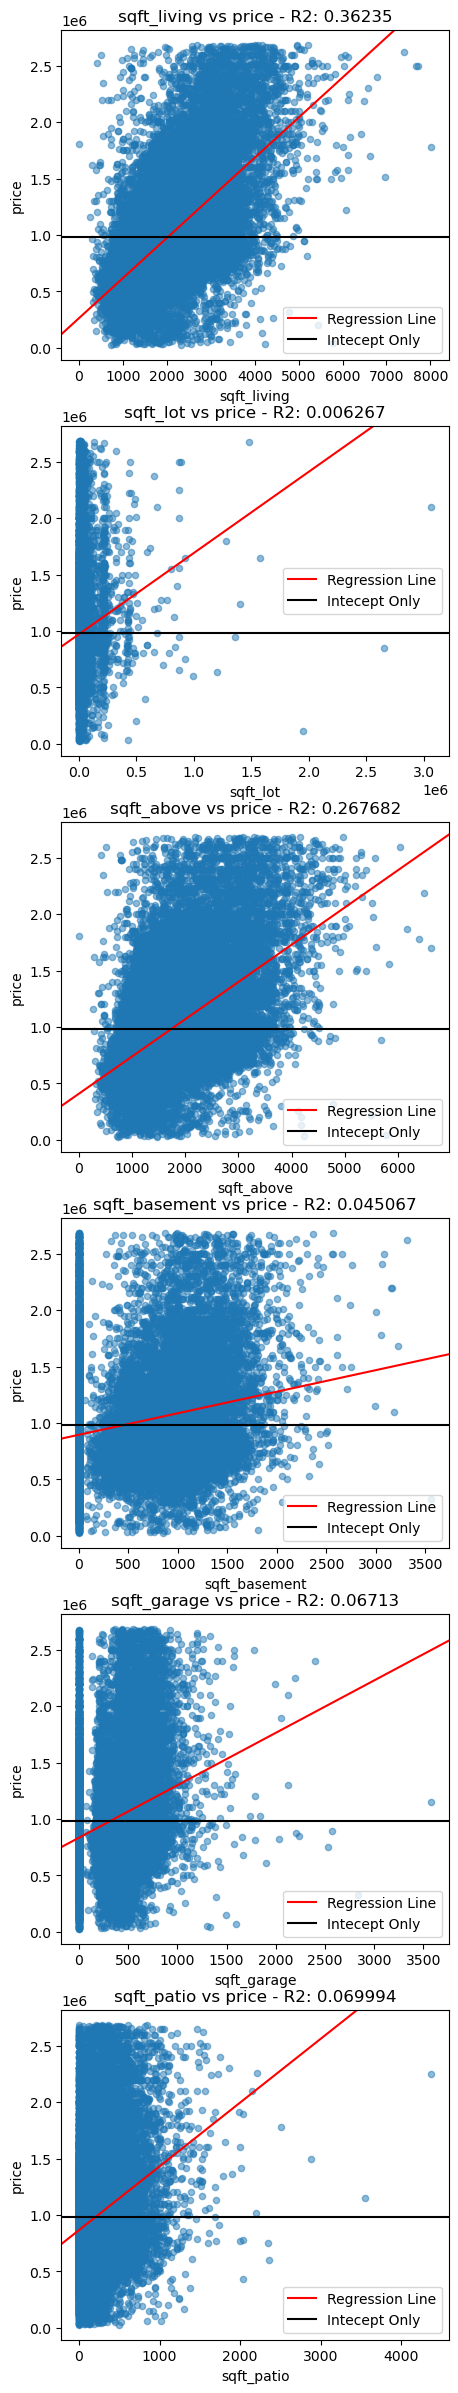

In [10]:
models = []
results = []
for column in continuous:
    model, result = helpers.dp.create_model(df_prepped_continuous, column, 'price')
    models.append(model)
    results.append(result)
fig, ax = helpers.dv.plot_dataframe(df_prepped_continuous, continuous[1:], 'price',  size = (5,30), regression= True, results= results[1:]);

In [8]:
fig, ax = plt.subplots(ncols= 2, nrows = 6, figsize = (20,40))
row = 0 
col = 0
for category in categorical[0:-1]:
    group = df_cleaned[[category, 'price']].groupby(category).mean()
    x_group = [value[0] for value in group.values.tolist()]
    ax[row][col].bar((group.index), x_group)
    ax[row][col].set_title(category)
    df_cleaned[category].value_counts()
    if col == 1:
        row += 1
        col = 0
    else:
        col += 1

### All Used Parameters 

In [ ]:
df_cleaned_all = pd.get_dummies(df_cleaned, drop_first= True)
X_all = df_cleaned_all[df_cleaned_all.columns[1:]]
y = df_cleaned_all['price']
model_all = sm.OLS(y, sm.add_constant(X_all))
result_all = model_all.fit()
print(result_all.summary())

In [ ]:
result_all.pvalues > .05
zip(result_all.pvalues.index, result_all.pvalues.values)
p_values_list_not = {index:value for index, value in zip(result_all.pvalues.index, result_all.pvalues.values) if value > .05}
print('Variables that were not statistically significant (alpha = .05):')
for key in p_values_list_not:
    print('{}: p_value = {}'.format(key, round(p_values_list_not[key],4)))

### Actions needed to take

In [ ]:
df_basement_0s = df_prepped_continuous.loc[df_prepped_continuous['sqft_basement'] != 0]#.plot.scatter('sqft_basement', y = 'price')
model, result = helpers.dp.create_model(df_basement_0s, 'sqft_basement', 'price')
model2, result2 = helpers.dp.create_model(df_prepped_continuous, 'sqft_basement', 'price')
fig, ax = plt.subplots(ncols= 2, figsize = (15,15))
df_prepped_continuous.loc[df_prepped_continuous['sqft_basement'] != 0].plot.scatter('sqft_basement', y = 'price', ax = ax[0])
sm.graphics.abline_plot(model_results= result , c = 'r', ax = ax[0], alpha = .5, label = '{}* sqft + {}'.format(round(result.params[1]), round(result.params[0])));
ax[0].legend()
df_prepped_continuous.plot.scatter('sqft_basement', y = 'price', ax = ax[1])
sm.graphics.abline_plot(model_results= result2, c = 'r', ax = ax[1], alpha = .5, label = '{}* sqft + {}'.format(round(result2.params[1]), round(result2.params[0])));
ax[1].legend()

In [ ]:
print(result.params, '\n', result2.params)

In [ ]:
all_model, all_results = helpers.dp.create_model(df_prepped, used_columns, 'price')
print('R-Squared = {}'.format(all_results.rsquared))
print(all_results.summary())

In [ ]:
df_log = helpers.de.apply_log(df_prepped, used_columns)
fig, ax = helpers.dv.plot_dataframe(df_log, used_columns, (10,50), regression= True, results= results);

In [ ]:
for column in ['sqft_basement', 'sqft_patio', 'sqft_garage']:
    print('Mean price with {}: {}'.format(column, df_prepped_continuous['price'].loc[df_prepped_continuous[column] != 0].mean()))
    print('Mean price without {}: {}'.format(column, df_prepped_continuous['price'].loc[df_prepped_continuous[column] == 0].mean()))
    print('Number of people with {}: {}'.format(column, len(df_prepped_continuous[column].loc[df_prepped_continuous[column] != 0])))
    print('Number of people without {}: {}'.format(column, len(df_prepped_continuous[column].loc[df_prepped_continuous[column] == 0])))

## Data Adjustments
As mentioned before, categorical data need to be prepped with dummy variables for modeling. There were also some categories that have less than 1% of observations that were binned as 'others'. 1% of the observation was determined to be roughly 300 observations

In [ ]:
for column in categorical:
    replace = df_cleaned[column].value_counts()[df_cleaned[column].value_counts()< 300].index
    if len(replace) > 0 : print('Replaced values {} in {}'.format(list(replace), column))
    df_cleaned[column].replace(replace, value= 'other',inplace= True)

df_cleaned_all = pd.get_dummies(df_cleaned, drop_first= True)
df_prepped_continuous = df_cleaned[continuous].copy()
df_prepped_categories = df_cleaned[categorical].copy()

df_cat_price = pd.concat([df_prepped_categories, df_prepped_continuous['price']], axis = 1)

## Data Analysis - Simple Regression Lines


### Actions needed to take
Look into the following parameters to see if they should be added or removed from the final model. 

## Conclusion

## Next Steps

First initial look are data frame
The Data Frame columns that will be useful will be price for the dependent y value
Id is just to keep track the house but that is not needed to interpritation
Data should be useful but might give insight to curent economic status
Useful features of a house might be 
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront','nuisance','view', 'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built', 'yr_renovated', 'address']

## Data Preperations
**Remove and drop columns and rows with few missing values for the data frame** <br>
**Seperate dateframe in categories and numeric data types** 

In [ ]:
prepared_df = helpers.dp.check_and_drop(df)    # Removed dups and missing values
useless_columns = ['id', 'date', 'lat', 'long', 'address']    #Not useful columns
prepared_df.drop(useless_columns, axis= 1, inplace = True)    #Drop useless columns
df_numeric, df_categories = helpers.dp.seperate_dataframe(df)    #Seperate the dataframe from categories and numeric
useful_columns = ['sqft_living','sqft_above','bathrooms','sqft_patio'
                  ,'bedrooms','sqft_garage','sqft_basement']    #Most correlations from these listed columns


In [ ]:
model, results = helpers.dp.create_model(df, df_numeric.columns, 'price')
print(results.summary())

In [ ]:
round(.00111,5)